# Electric Car Portfolio

## Auto Industry Electric Car. Tesla is number one making electric cars. 

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
from tabulate import tabulate
from scipy.stats import norm
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [40]:
# input
symbols = ['FSR','TSLA','NIO','LI', 'KNDI', 'NKLA']
start = '2019-01-01'
end = '2020-11-26'

# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  6 of 6 completed


,FSR,KNDI,LI,NIO,NKLA,TSLA
Date,,,,,,
2019-01-02,9.63,4.15,NaN,6.20,9.700,62.023998
2019-01-03,9.63,4.17,NaN,6.05,9.725,60.071999
2019-01-04,9.63,4.40,NaN,6.36,9.725,63.537998
2019-01-07,9.63,4.53,NaN,6.50,9.725,66.991997
2019-01-08,9.65,4.43,NaN,6.40,9.725,67.070000


In [41]:
df.tail()

,FSR,KNDI,LI,NIO,NKLA,TSLA
Date,,,,,,
2020-11-19,17.000000,14.41,36.740002,48.450001,26.230000,499.269989
2020-11-20,16.299999,12.06,38.119999,49.250000,26.379999,489.609985
2020-11-23,15.970000,14.93,43.639999,55.380001,29.410000,521.849976
2020-11-24,15.970000,14.44,43.959999,53.509998,34.500000,555.380005
2020-11-25,21.610001,14.50,40.720001,53.689999,30.240000,574.000000


In [42]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


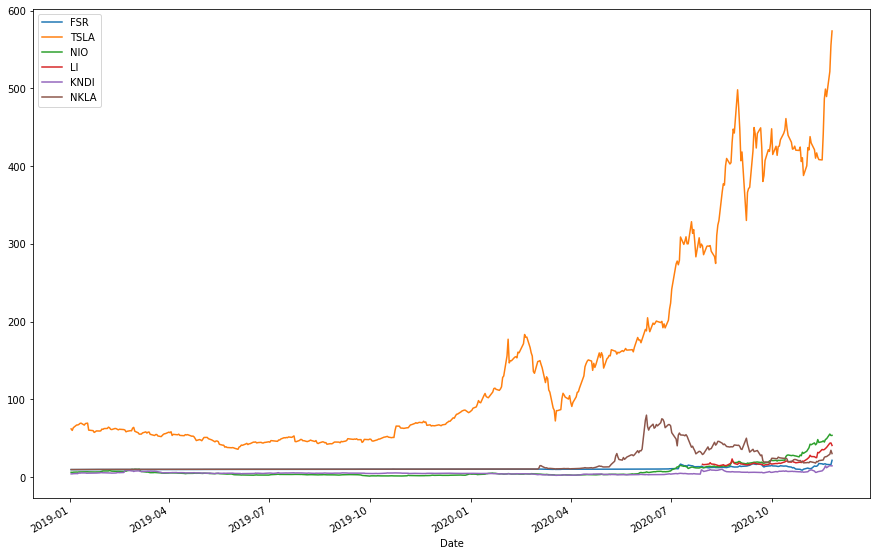

In [43]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.legend()

In [44]:
for s in symbols:
    print(s + ":",  df[s].max())

FSR: 21.610000610351562
TSLA: 574.0
NIO: 55.380001068115234
LI: 43.959999084472656
KNDI: 14.930000305175781
NKLA: 79.7300033569336


In [45]:
for s in symbols:
    print(s + ":",  df[s].min())

FSR: 8.960000038146973
TSLA: 35.79399871826172
NIO: 1.3200000524520874
LI: 14.600000381469727
KNDI: 2.25
NKLA: 9.699999809265137


In [46]:
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = (np.log(1 + df[s].pct_change())).dropna()
    
returns.head(4)

,FSR Return,TSLA Return,NIO Return,LI Return,KNDI Return,NKLA Return
Date,,,,,,
2019-01-03,0.000000,-0.031978,-0.024491,NaN,0.004808,0.002574
2019-01-04,0.000000,0.056094,0.049970,NaN,0.053689,0.000000
2019-01-07,0.000000,0.052935,0.021774,NaN,0.029117,0.000000
2019-01-08,0.002075,0.001164,-0.015504,NaN,-0.022322,0.000000


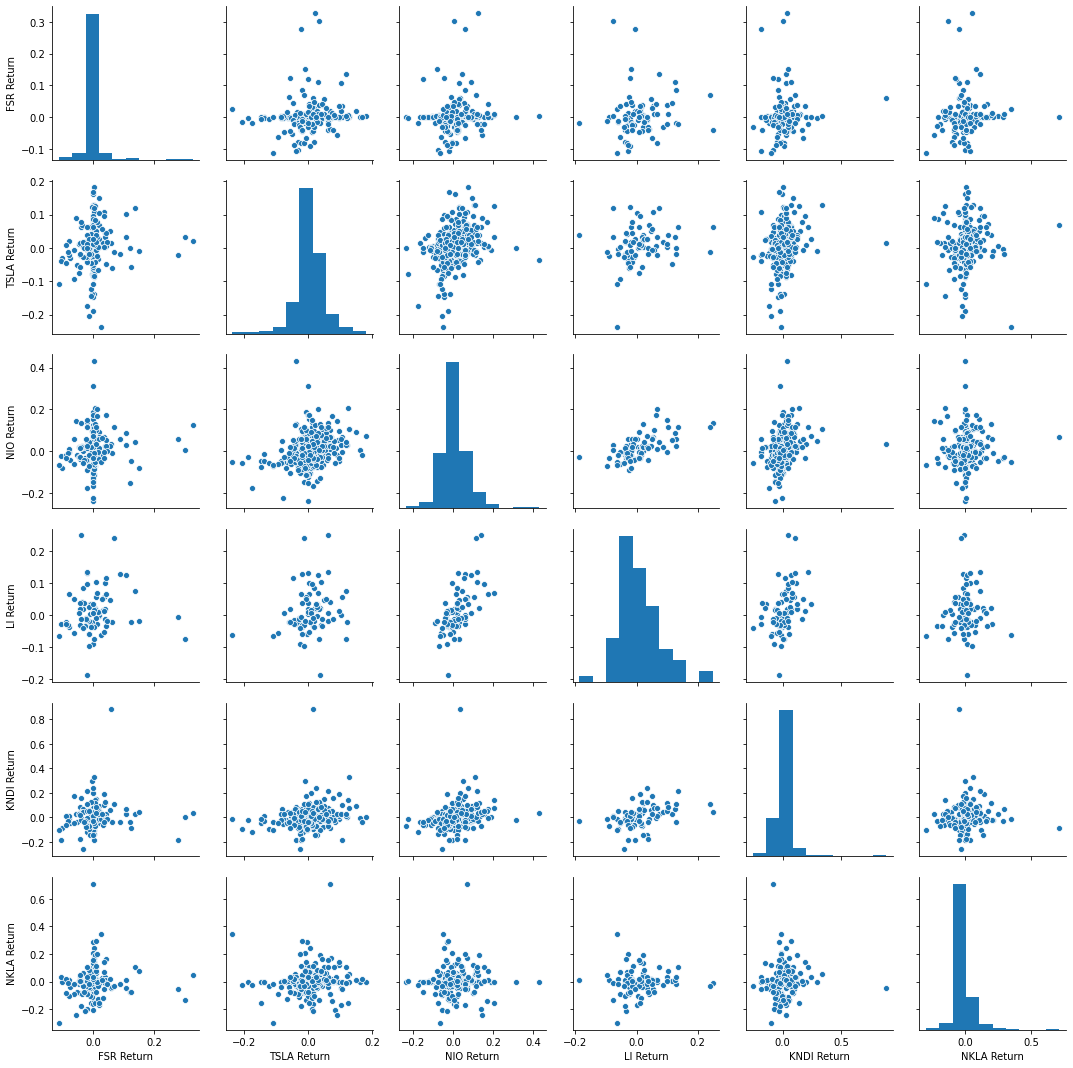

In [47]:
sns.pairplot(returns[1:])

In [48]:
# dates each bank stock had the best and worst single day returns. 
print('Best Day Returns')
print('-'*20)
print(returns.idxmax())
print('\n')
print('Worst Day Returns')
print('-'*20)
print(returns.idxmin())

Best Day Returns
--------------------
FSR Return    2020-07-09
TSLA Return   2020-02-03
NIO Return    2019-12-30
LI Return     2020-08-26
KNDI Return   2020-07-29
NKLA Return   2020-06-08
dtype: datetime64[ns]


Worst Day Returns
--------------------
FSR Return    2020-09-23
TSLA Return   2020-09-08
NIO Return    2019-03-06
LI Return     2020-08-27
KNDI Return   2020-11-10
NKLA Return   2020-09-23
dtype: datetime64[ns]


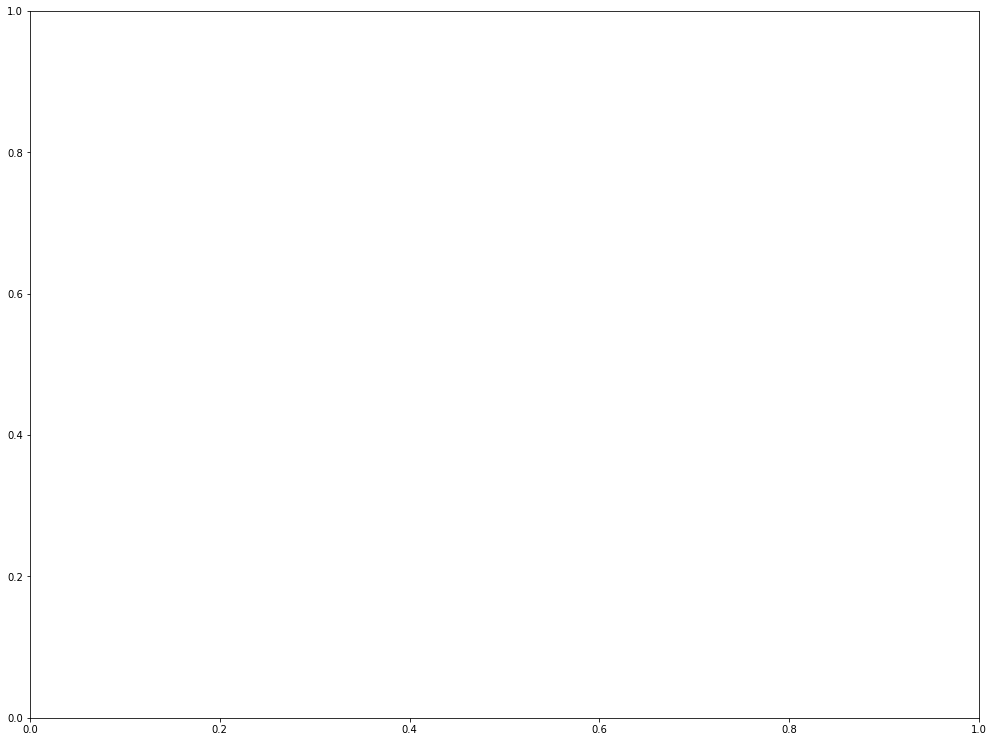

In [49]:
plt.figure(figsize=(17,13))

for r in returns:
    sns.kdeplot(returns.loc["2012-01-01" : "2013-12-31 "][r])

In [50]:
returns.corr()

,FSR Return,TSLA Return,NIO Return,LI Return,KNDI Return,NKLA Return
FSR Return,1.000000,0.114697,0.091544,0.087202,0.087100,0.071237
TSLA Return,0.114697,1.000000,0.293193,0.199409,0.217315,0.060242
NIO Return,0.091544,0.293193,1.000000,0.639071,0.294417,0.048355
LI Return,0.087202,0.199409,0.639071,1.000000,0.402094,0.065085
KNDI Return,0.087100,0.217315,0.294417,0.402094,1.000000,0.061916
NKLA Return,0.071237,0.060242,0.048355,0.065085,0.061916,1.000000


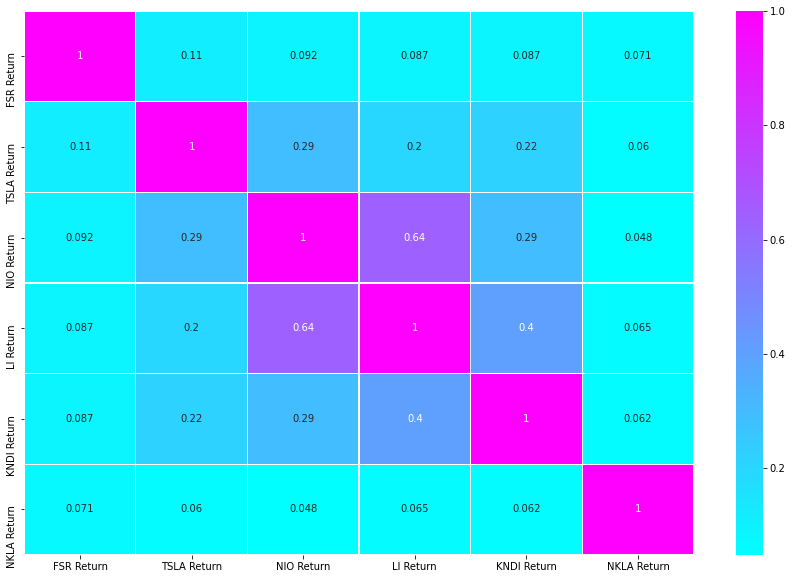

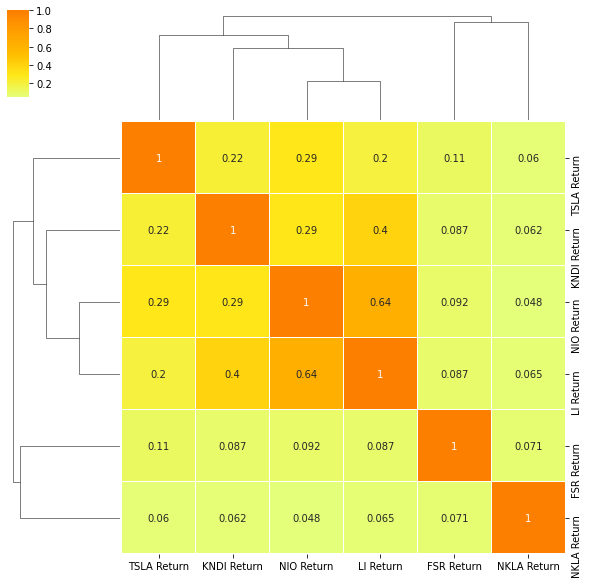

In [51]:
# Heatmap for return of all the banks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="cool",linewidths=.1, annot= True)

sns.clustermap(returns.corr(), cmap="Wistia",linewidths=.1, annot= True)

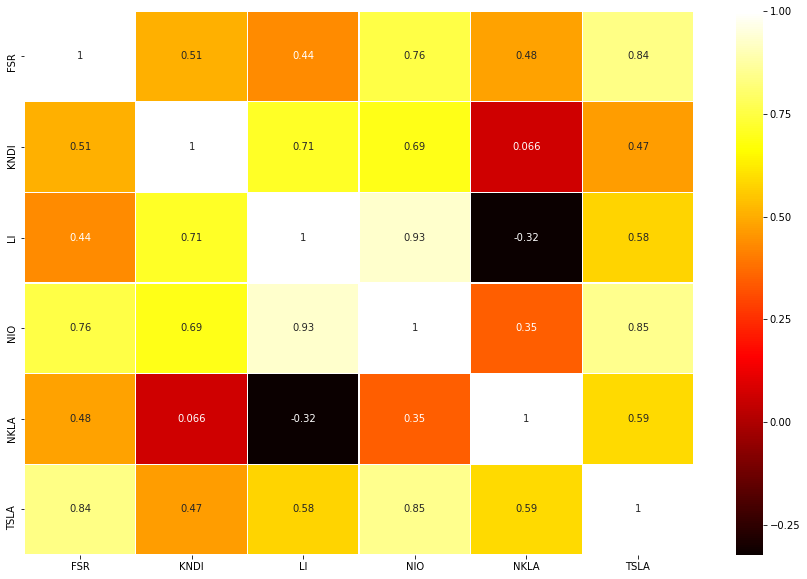

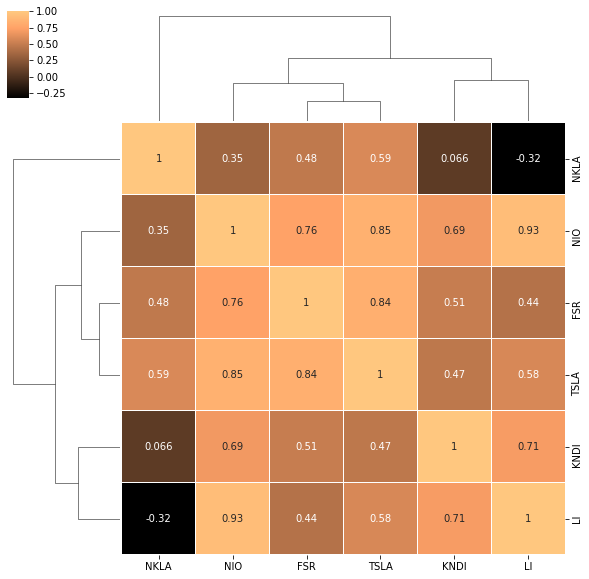

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="hot",linewidths=.1, annot= True)

sns.clustermap(df.corr(), cmap="copper",linewidths=.1, annot= True)

In [53]:
Cash = 100000
print('Percentage of invest:')
percent_invest = [0.16, 0.16, 0.16, 0.16, 0.16, 0.16]
for i, x in zip(df.columns, percent_invest):
    cost = x * Cash
    print('{}: {}'.format(i, cost))

Percentage of invest:
FSR: 16000.0
KNDI: 16000.0
LI: 16000.0
NIO: 16000.0
NKLA: 16000.0
TSLA: 16000.0


In [54]:
print('Number of Shares:')
percent_invest = [0.16, 0.16, 0.16, 0.16, 0.16, 0.16]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    print('{}: {}'.format(i, shares))

Number of Shares:
FSR: 1661
KNDI: 3855


ValueError: cannot convert float NaN to integer

In [ ]:
print('Beginning Value:')
percent_invest = [0.16, 0.16, 0.16, 0.16, 0.16, 0.16]
for i, x, y in zip(df.columns, percent_invest, df.iloc[0]):
    cost = x * Cash
    shares = int(cost/y)
    Begin_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Begin_Value))

In [ ]:
print('Current Value:')
percent_invest = [0.16, 0.16, 0.16, 0.16, 0.16, 0.16]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    print('{}: ${}'.format(i, Current_Value))

In [ ]:
result = []
percent_invest = [0.16, 0.16, 0.16, 0.16, 0.16, 0.16]
for i, x, y, z in zip(df.columns, percent_invest, df.iloc[0], df.iloc[-1]):
    cost = x * Cash
    shares = int(cost/y)
    Current_Value = round(shares * z, 2)
    result.append(Current_Value)
print('Total Value: $%s' % round(sum(result),2))

In [ ]:
# Calculate Daily Returns
returns = df.pct_change()
returns = returns.dropna()

In [ ]:
# Calculate mean returns
meanDailyReturns = returns.mean()
print(meanDailyReturns)

In [ ]:
# Calculate std returns
stdDailyReturns = returns.std()
print(stdDailyReturns)

In [ ]:
# Define weights for the portfolio
weights = np.array([0.16, 0.16, 0.16, 0.16, 0.16, 0.16])

In [ ]:
# Calculate the covariance matrix on daily returns
cov_matrix = (returns.cov())*250
print (cov_matrix)

In [ ]:
# Calculate expected portfolio performance
portReturn = np.sum(meanDailyReturns*weights)

In [ ]:
# Print the portfolio return
print(portReturn)

In [ ]:
# Create portfolio returns column
returns['Portfolio'] = returns.dot(weights)

In [ ]:
returns.head()

In [ ]:
returns.tail()

In [ ]:
# Calculate cumulative returns
daily_cum_ret=(1+returns).cumprod()
print(daily_cum_ret.tail())

In [ ]:
returns['Portfolio'].hist()
plt.show()

In [ ]:
# 99% confidence interval
# 0.01 empirical quantile of daily returns
var99 = round((returns['Portfolio']).quantile(0.01), 3)

In [ ]:
print('Value at Risk (99% confidence)')
print(var99)

In [ ]:
# the percent value of the 5th quantile
print('Percent Value-at-Risk of the 5th quantile')
var_1_perc = round(np.quantile(var99, 0.01), 3)
print("{:.1f}%".format(-var_1_perc*100))

In [ ]:
print('Value-at-Risk of 99% for 100,000 investment')
print("${}".format(-var99 * 100000))

In [ ]:
# 95% confidence interval
# 0.05 empirical quantile of daily returns
var95 = round((returns['Portfolio']).quantile(0.05), 3)

In [ ]:
print('Value at Risk (95% confidence)')
print(var95)

In [ ]:
print('Percent Value-at-Risk of the 5th quantile')
print("{:.1f}%".format(-var95*100))

In [ ]:
# VaR for 100,000 investment
print('Value-at-Risk of 99% for 100,000 investment')
var_100k = "${}".format(int(-var95 * 100000))
print("${}".format(int(-var95 * 100000)))

In [ ]:
mean = np.mean(returns['Portfolio'])
std_dev = np.std(returns['Portfolio'])

In [ ]:
returns['Portfolio'].hist(bins=50, normed=True, histtype='stepfilled', alpha=0.5)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x, mlab.normpdf(x, mean, std_dev), "r")
plt.title('Histogram of Returns')
plt.show()

In [ ]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [ ]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

In [ ]:
import matplotlib.dates

# Plot the portfolio cumulative returns only
fig, ax = plt.subplots()
ax.plot(daily_cum_ret.index, daily_cum_ret.Portfolio, color='green', label="portfolio")
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
plt.legend()
plt.show()

In [ ]:
# Print the mean
print("mean : ", returns['Portfolio'].mean()*100)

# Print the standard deviation
print("Std. dev: ", returns['Portfolio'].std()*100)

# Print the skewness
print("skew: ", returns['Portfolio'].skew())

# Print the kurtosis
print("kurt: ", returns['Portfolio'].kurtosis())

In [ ]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(weights, cov_matrix)))

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')

In [ ]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

In [ ]:
# Calculate total return and annualized return from price data 
total_return = returns['Portfolio'][-1] - returns['Portfolio'][0]
                
# Annualize the total return over 5 year 
annualized_return = ((1+total_return)**(1/7))-1

In [ ]:
# Calculate annualized volatility from the standard deviation
vol_port = returns['Portfolio'].std() * np.sqrt(250)

In [ ]:
# Calculate the Sharpe ratio 
rf = 0.001
sharpe_ratio = (annualized_return - rf) / vol_port
print(sharpe_ratio)

In [ ]:
# Create a downside return column with the negative returns only
target = 0
downside_returns = returns.loc[returns['Portfolio'] < target]

# Calculate expected return and std dev of downside
expected_return = returns['Portfolio'].mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
rf = 0.01
sortino_ratio = (expected_return - rf)/down_stdev

# Print the results
print("Expected return: ", expected_return*100)
print('-' * 50)
print("Downside risk:")
print(down_stdev*100)
print('-' * 50)
print("Sortino ratio:")
print(sortino_ratio)

In [ ]:
# Calculate the max value 
roll_max = returns['Portfolio'].rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = returns['Portfolio']/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(returns.index, daily_draw_down, label='Daily drawdown')
plt.plot(returns.index, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(7,7))
corr = returns.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

In [ ]:
# Box plot
returns.plot(kind='box')

In [ ]:
rets = returns.dropna()

plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [ ]:
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Core and Satellite", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [ ]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

In [ ]:
table.sort_values(by='Risk')

In [ ]:
rf = 0.001
table['Sharpe_Ratio'] = ((table['Returns'] - rf) / table['Risk']) * np.sqrt(252)
table